In [1]:
#import libraries
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
import pandas as pd
import itertools
import keras

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [2]:
#load data
X = pickle.load(open("input_4_X.pickle", "rb"))
y = pickle.load(open("input_4_y.pickle", "rb"))

In [3]:
#split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
#normalise data
X_train /= 255.0
X_test /= 255.0

In [6]:
#batch_size to train
batch_size = 16
# number of output classes
nb_classes = 3
# number of epochs to train
nb_epoch = 20

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [7]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [8]:
#configure model
model = Sequential()

model.add(Conv2D(nb_filters, nb_conv, nb_conv,
                        input_shape=X.shape[1:]))
convout1 = Activation('relu')
model.add(convout1)
model.add(Conv2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

opt = Adam(learning_rate = 0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [9]:
#train model
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=270,
                verbose=1, validation_data=(X_test, Y_test))

2021-08-24 18:11:07.332253: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/270
14/14 [==============================] - 3s 123ms/step - loss: 1.1334 - accuracy: 0.2890 - val_loss: 1.1008 - val_accuracy: 0.2727
Epoch 2/270
14/14 [==============================] - 1s 76ms/step - loss: 1.0936 - accuracy: 0.3945 - val_loss: 1.1120 - val_accuracy: 0.2727
Epoch 3/270
14/14 [==============================] - 1s 72ms/step - loss: 1.0836 - accuracy: 0.4037 - val_loss: 1.0915 - val_accuracy: 0.2727
Epoch 4/270
14/14 [==============================] - 1s 71ms/step - loss: 1.0928 - accuracy: 0.3807 - val_loss: 1.0749 - val_accuracy: 0.6727
Epoch 5/270
14/14 [==============================] - 1s 76ms/step - loss: 1.0893 - accuracy: 0.3716 - val_loss: 1.0711 - val_accuracy: 0.3455
Epoch 6/270
14/14 [==============================] - 1s 74ms/step - loss: 1.0747 - accuracy: 0.4174 - val_loss: 1.0485 - val_accuracy: 0.6182
Epoch 7/270
14/14 [==============================] - 1s 74ms/step - loss: 1.0633 - accuracy: 0.4450 - val_loss: 1.0551 - val_accuracy: 0.3091
Epoch

14/14 [==============================] - 2s 109ms/step - loss: 0.4731 - accuracy: 0.7798 - val_loss: 0.5231 - val_accuracy: 0.8182
Epoch 59/270
14/14 [==============================] - 1s 100ms/step - loss: 0.4579 - accuracy: 0.7982 - val_loss: 0.5232 - val_accuracy: 0.7818
Epoch 60/270
14/14 [==============================] - 2s 124ms/step - loss: 0.4421 - accuracy: 0.8303 - val_loss: 0.5100 - val_accuracy: 0.8364
Epoch 61/270
14/14 [==============================] - 1s 90ms/step - loss: 0.4441 - accuracy: 0.8211 - val_loss: 0.5093 - val_accuracy: 0.8364
Epoch 62/270
14/14 [==============================] - 2s 113ms/step - loss: 0.4229 - accuracy: 0.8119 - val_loss: 0.5221 - val_accuracy: 0.6727
Epoch 63/270
14/14 [==============================] - 2s 171ms/step - loss: 0.4528 - accuracy: 0.7890 - val_loss: 0.5001 - val_accuracy: 0.8364
Epoch 64/270
14/14 [==============================] - 2s 120ms/step - loss: 0.4358 - accuracy: 0.8073 - val_loss: 0.4946 - val_accuracy: 0.8364
Epoch 

14/14 [==============================] - 1s 73ms/step - loss: 0.2294 - accuracy: 0.9174 - val_loss: 0.4217 - val_accuracy: 0.7455
Epoch 116/270
14/14 [==============================] - 1s 71ms/step - loss: 0.2038 - accuracy: 0.9266 - val_loss: 0.3060 - val_accuracy: 0.9273
Epoch 117/270
14/14 [==============================] - 1s 74ms/step - loss: 0.1733 - accuracy: 0.9541 - val_loss: 0.3053 - val_accuracy: 0.8909
Epoch 118/270
14/14 [==============================] - 1s 72ms/step - loss: 0.1938 - accuracy: 0.9404 - val_loss: 0.3151 - val_accuracy: 0.8909
Epoch 119/270
14/14 [==============================] - 1s 72ms/step - loss: 0.1954 - accuracy: 0.9312 - val_loss: 0.3076 - val_accuracy: 0.9091
Epoch 120/270
14/14 [==============================] - 1s 80ms/step - loss: 0.1741 - accuracy: 0.9541 - val_loss: 0.3159 - val_accuracy: 0.8909
Epoch 121/270
14/14 [==============================] - 1s 72ms/step - loss: 0.1898 - accuracy: 0.9450 - val_loss: 0.3063 - val_accuracy: 0.9091
Epoch 

Epoch 172/270
14/14 [==============================] - 1s 80ms/step - loss: 0.1161 - accuracy: 0.9633 - val_loss: 0.2622 - val_accuracy: 0.8909
Epoch 173/270
14/14 [==============================] - 1s 79ms/step - loss: 0.1093 - accuracy: 0.9679 - val_loss: 0.3013 - val_accuracy: 0.8364
Epoch 174/270
14/14 [==============================] - 1s 72ms/step - loss: 0.0965 - accuracy: 0.9817 - val_loss: 0.2635 - val_accuracy: 0.9091
Epoch 175/270
14/14 [==============================] - 1s 72ms/step - loss: 0.0975 - accuracy: 0.9771 - val_loss: 0.2887 - val_accuracy: 0.9091
Epoch 176/270
14/14 [==============================] - 1s 79ms/step - loss: 0.1033 - accuracy: 0.9679 - val_loss: 0.2616 - val_accuracy: 0.8909
Epoch 177/270
14/14 [==============================] - 1s 78ms/step - loss: 0.1125 - accuracy: 0.9725 - val_loss: 0.2622 - val_accuracy: 0.8909
Epoch 178/270
14/14 [==============================] - 1s 83ms/step - loss: 0.1062 - accuracy: 0.9725 - val_loss: 0.3281 - val_accuracy:

Epoch 229/270
14/14 [==============================] - 1s 77ms/step - loss: 0.0569 - accuracy: 0.9954 - val_loss: 0.2400 - val_accuracy: 0.9091
Epoch 230/270
14/14 [==============================] - 1s 76ms/step - loss: 0.0572 - accuracy: 0.9862 - val_loss: 0.2536 - val_accuracy: 0.8909
Epoch 231/270
14/14 [==============================] - 1s 79ms/step - loss: 0.0668 - accuracy: 0.9862 - val_loss: 0.2625 - val_accuracy: 0.9091
Epoch 232/270
14/14 [==============================] - 1s 97ms/step - loss: 0.0640 - accuracy: 0.9908 - val_loss: 0.2532 - val_accuracy: 0.9091
Epoch 233/270
14/14 [==============================] - 1s 84ms/step - loss: 0.0502 - accuracy: 0.9908 - val_loss: 0.2549 - val_accuracy: 0.8909
Epoch 234/270
14/14 [==============================] - 1s 81ms/step - loss: 0.0674 - accuracy: 0.9633 - val_loss: 0.2481 - val_accuracy: 0.9091
Epoch 235/270
14/14 [==============================] - 1s 81ms/step - loss: 0.0665 - accuracy: 0.9817 - val_loss: 0.2517 - val_accuracy:

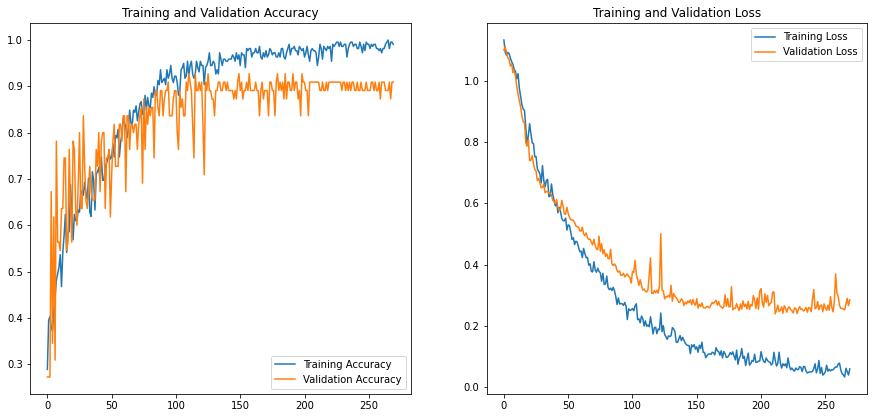

In [10]:
#plot output
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(270)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
#model score
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.2846721410751343
Test accuracy: 0.9090909361839294


In [12]:
#print classification report
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis=1)
print(classification_report(y_test,predictions,target_names = ['cyanobacteria','diatom','green']))

               precision    recall  f1-score   support

cyanobacteria       0.84      0.89      0.86        18
       diatom       0.90      0.86      0.88        22
        green       1.00      1.00      1.00        15

     accuracy                           0.91        55
    macro avg       0.92      0.92      0.92        55
 weighted avg       0.91      0.91      0.91        55



In [13]:
#plot confusion matrix
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it’s categorical variable
categorical_test_labels = pd.DataFrame(y_test)
categorical_preds = pd.DataFrame(predictions)
confusion_matrix_test = confusion_matrix(categorical_test_labels, categorical_preds)

In [14]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes, normalize=False,title ='Confusion Matrix', cmap = plt.cm.Blues):
 
#Add Normalization Option - prints pretty confusion metric with normalization option ‘’’
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
 
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

Normalized confusion matrix


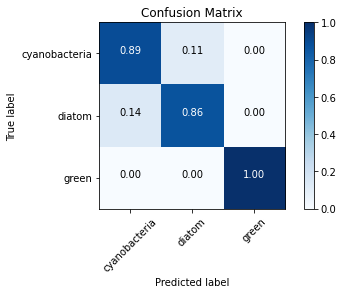

In [15]:
plot_confusion_matrix(confusion_matrix_test,['cyanobacteria','diatom','green'],normalize=True)

In [16]:
#validation / unseen data test
#load data
X_unseen = pickle.load(open("test_X.pickle", "rb"))
y_unseen = pickle.load(open("test_y.pickle", "rb"))

In [17]:
#normalise data
X_unseen = X_unseen.astype('float32')
X_unseen /= 255.0

In [18]:
#predictions and classification report
predictions_unseen = model.predict(X_unseen)
predictions_unseen = np.argmax(predictions_unseen,axis=1)
print(classification_report(y_unseen,predictions_unseen,target_names = ['cyanobacteria','diatom','green']))

               precision    recall  f1-score   support

cyanobacteria       0.51      0.50      0.51        40
       diatom       0.51      0.64      0.57        50
        green       1.00      0.60      0.75        30

     accuracy                           0.58       120
    macro avg       0.67      0.58      0.61       120
 weighted avg       0.63      0.58      0.59       120



In [19]:
#prepare confusion matrix for unseen data
categorical_test_labels_unseen = pd.DataFrame(y_unseen)
categorical_preds_unseen = pd.DataFrame(predictions_unseen)
confusion_matrix_unseen = confusion_matrix(categorical_test_labels_unseen, categorical_preds_unseen)

Normalized confusion matrix


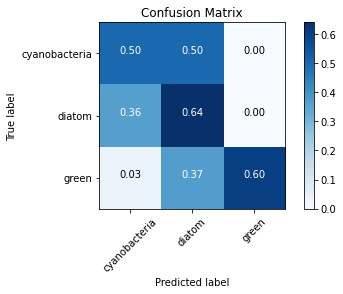

In [20]:
#plot confusion matrix
plot_confusion_matrix(confusion_matrix_unseen,['cyanobacteria','diatom','green'],normalize=True)